# DSAC_3day

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#한글패치
from matplotlib import font_manager, rc
path = "c:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [142]:
#전력사용량 데이터
power = pd.read_excel('data/시도별_용도별.xls')

power.head(3)

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859


In [143]:
# 데이터 전처리
power.set_index('구분',inplace=True)
power1 = power.drop(['개성','합계'])
power1 = power1.drop('합계',axis = 1)

power1.columns

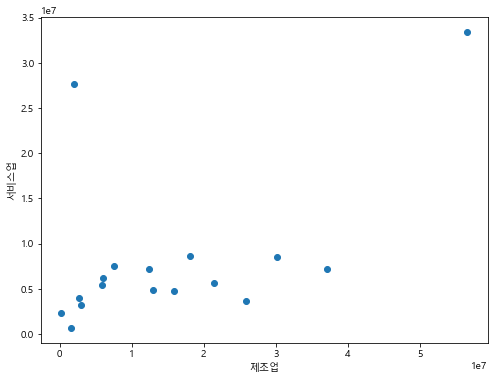

In [168]:
# 산점도 그래프
plt.figure(figsize=(8,6))
plt.xlabel('제조업')
plt.ylabel('서비스업')
plt.scatter(power1['제조업'],power1['서비스업'])

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

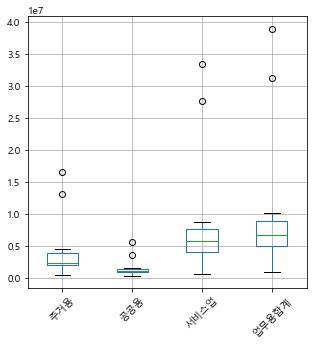

In [171]:
# 박스플롯
plt.figure(figsize=(5,5))
#power1.T.boxplot()
#power1.boxplot()
power1[['주거용','공공용','서비스업','업무용합계']].boxplot()
plt.xticks(rotation=45) #글자45도 돌리기

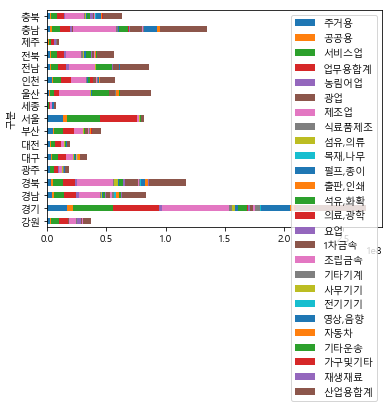

In [176]:
#바그래프
#power1.plot(kind = 'bar',stacked = True)
#power1.plot(kind = 'barh',stacked = False)
power1.plot(kind = 'barh',stacked = True)

Text(0.5, 1.0, 'power1')

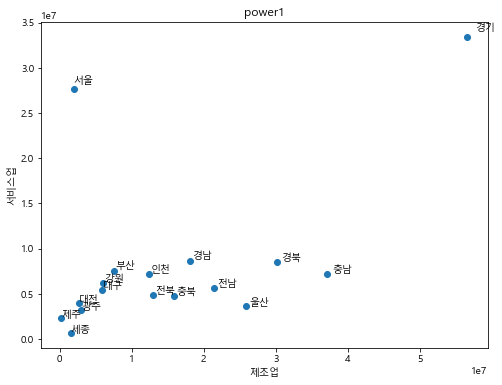

In [190]:
# 데이터에 라벨붙이기
plt.figure(figsize=(8,6))
plt.xlabel('제조업')
plt.ylabel('서비스업')
plt.scatter(power1['제조업'],power1['서비스업'])
for n in range(power1.shape[0]):
    plt.text(power1['제조업'][n]*1.02,power1['서비스업'][n]*1.02,power1.index[n])
plt.title('power1')

Text(0.5, 1.0, 'power2')

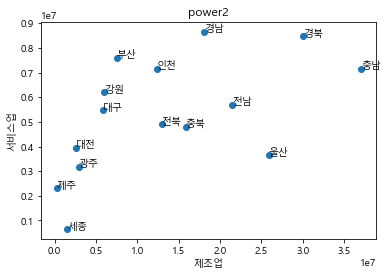

In [192]:
# 이상치 제거
power2 = power1.drop(['서울','경기'])
plt.xlabel('제조업')
plt.ylabel('서비스업')
plt.scatter(power2['제조업'],power2['서비스업'])
for n in range(power2.shape[0]):
    plt.text(power2['제조업'][n],power2['서비스업'][n],power2.index[n])
plt.title('power2')

## clustering 연습

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [36.25, 36.25, 83.75, 83.75],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [60.0, 60.0, 130.0, 130.0]],
 'dcoord': [[0.0, 1710061.974984825, 1710061.974984825, 0.0],
  [0.0, 3043246.288119481, 3043246.288119481, 0.0],
  [1710061.974984825, 4348307.924220294, 4348307.924220294, 3043246.288119481],
  [0.0, 4802848.110011704, 4802848.110011704, 0.0],
  [0.0, 4657254.6127551105, 4657254.6127551105, 4802848.110011704],
  [4348307.924220294,
   9343072.809294693,
   9343072.809294693,
   4657254.6127551105],
  [0.0, 5695128.446028237, 5695128.446028237, 0.0],
  [0.0, 6732731.075477173, 6732731.075477173, 5695128.446028237],
  [0.0, 9716608.53359852, 9716608.53359852, 6732731.075

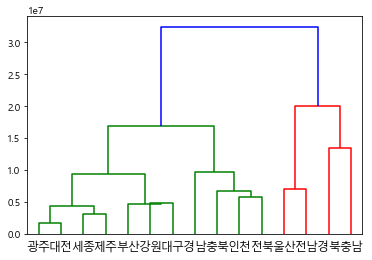

In [209]:
from scipy.cluster.hierarchy import dendrogram, linkage

#link_dist = linkage(power1, metric = 'euclidean', method='centroid',)
#link_dist = linkage(power1, metric = 'euclidean', method='ward',)
link_dist = linkage(power2, metric = 'euclidean', method='centroid',)

#link_dist

#dendrogram(link_dist, labels = power1.index)
dendrogram(link_dist, labels = power2.index)

## clustering by KMeans()

In [210]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=4)
#k.fit(power1)
k.fit(power2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [212]:
print(k.labels_)
#print(k.cluster_centers_)

[2 0 1 2 2 2 2 2 3 0 3 0 2 1 0]


In [213]:
#power1['클러스터종류'] = k.labels_
#power1['클러스터종류']
power2['클러스터종류'] = k.labels_
power2['클러스터종류']

구분
강원    2
경남    0
경북    1
광주    2
대구    2
대전    2
부산    2
세종    2
울산    3
인천    0
전남    3
전북    0
제주    2
충남    1
충북    0
Name: 클러스터종류, dtype: int32

In [217]:
# 저장된 클러스터 컬럼(axis=1) 제거
power3 = power1.drop(['클러스터종류'], axis = 1)
power3.columns

Index(['주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조', '섬유,의류',
       '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속', '조립금속',
       '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계'],
      dtype='object')

Text(0.5, 1.0, 'power2(전력사용량)')

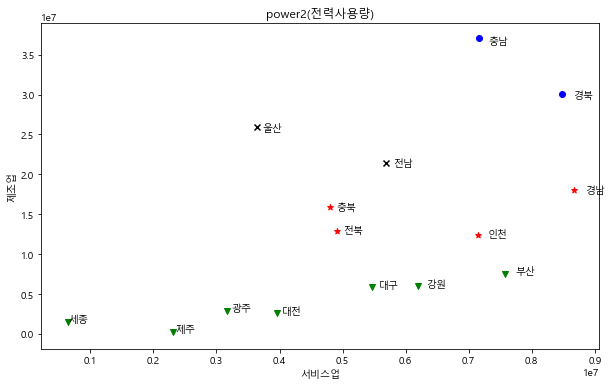

In [224]:
# 산점도 그래프에 군집화를 해보자
plt.figure(figsize=(10,6))
plt.xlabel('서비스업')
plt.ylabel('제조업')

my_marker = ['*','o','v','x']
my_colors = ['r','b','g','k']

for i in range(4):
    t = power2['클러스터종류']
    xs = power2['서비스업'][t==i]
    ys = power2['제조업'][t==i]
    plt.scatter(xs,ys,marker=my_marker[i], c = my_colors[i])
    
for n in range(power2.shape[0]):
    plt.text(power2['서비스업'][n]*1.02, power2['제조업'][n]*0.98, power2.index[n])
plt.title('power2(전력사용량)')